In [8]:
from pandas_datareader import data

In [9]:
ccl = data.DataReader("CCL", 
                       start='2000-1-1', 
                       end='2020-12-31', 
                       data_source='yahoo')

In [11]:
ccl = ccl.reset_index()

In [12]:
ccl['Year'] = ccl['Date'].dt.year
ccl['month'] = ccl['Date'].dt.month
ccl['day'] = ccl['Date'].dt.day

In [16]:
def quarter(row):
    if row['month'] == 1 or row['month'] == 2 or row['month'] == 3:
        return 1
    elif row['month'] == 4 or row['month'] == 5 or row['month'] == 6:
        return 4
    elif row['month'] == 7 or row['month'] == 8 or row['month'] == 9:
        return 7
    else:
        return 10

ccl['quarter'] = ccl.apply(quarter, axis =1)

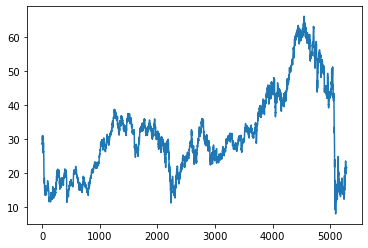

In [18]:
import matplotlib.pyplot as plt
plt.plot(ccl['Adj Close'])
plt.show()

In [20]:
import pandas as pd

data = pd.read_csv('data_usa.csv', index_col=0)

data_ccl = data[data['year'] >= 2000 ]
data_ccl

,DATE,GDP,growth_rate,year,month,jobs,growth_jobs
212,2000-01-01,10002.857,1.045308,2000,1,131005,0.636057
213,2000-04-01,10247.679,2.447521,2000,4,131888,0.674020
214,2000-07-01,10319.825,0.704023,2000,7,132236,0.263860
215,2000-10-01,10439.025,1.155058,2000,10,132351,0.086966
216,2001-01-01,10472.879,0.324302,2001,1,132698,0.262182
...,...,...,...,...,...,...,...
291,2019-10-01,21729.124,0.866119,2019,10,151524,0.404869
292,2020-01-01,21539.689,-0.871802,2020,1,152234,0.468573
293,2020-04-01,19520.114,-9.376064,2020,4,130161,-14.499389
294,2020-07-01,21170.252,8.453526,2020,7,139566,7.225667


In [22]:
ccl_final = pd.merge(left = data_ccl.reset_index(drop=True), right = ccl, left_on = 'month', right_on = 'quarter', how= 'left')

In [29]:
ccl_final = ccl_final[['Date','GDP','growth_rate','jobs','growth_jobs','High','Low','Open','Close','Volume','Adj Close','quarter','Year','month_y','day']].set_index('Date')

In [2]:
ccl_final

NameError: name 'aapl_final' is not defined

In [1]:
X = ccl_final.drop(['GDP','jobs','Close','Volume'], axis = 1)
y = ccl_final['Close']

X_train = X[:105416]
y_train = y[1:105417]

X_test = X[105416:len(X)-1]
y_test = y[105417:]


NameError: name 'aapl_final' is not defined

In [40]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
display(xgb_reg.score(X_test,y_test))
display(xgb_reg.score(X_train,y_train))

[13:34:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9887836725128548

0.9885041036844388

In [41]:
pred = xgb_reg.predict(X_test)

In [42]:
from sklearn.metrics import r2_score


r2_score(y_test, pred)

0.9887836725128548

In [43]:
from sklearn.model_selection import cross_validate

results = cross_validate(xgb_reg,X_train, y_train, cv = 10)


[13:35:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [44]:
results['test_score'].mean()
results['test_score']

array([0.98852538, 0.98862401, 0.98834009, 0.98801977, 0.98855727,
       0.98817083, 0.98837231, 0.988122  , 0.98812525, 0.98826555])

In [45]:
import pickle

pickle.dump(xgb_reg, open('model_ccl.p', 'wb'))